In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_f=pd.read_csv("DailyDelhiClimateTrain.csv")
##looking through the data
data_f.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [13]:
##see what dt are there and quick brief
data_f.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,25.495221,60.777158,6.802384,1006.540394
std,7.350610,16.774096,4.563159,45.046526
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.571429
50%,27.714286,62.625000,6.193333,1008.555556
75%,31.312500,72.250000,9.250000,1014.937500
max,38.714286,100.000000,42.220000,1352.615385


In [3]:
##start cleaning 
data_f.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

np.float64(1352.6153846153843)

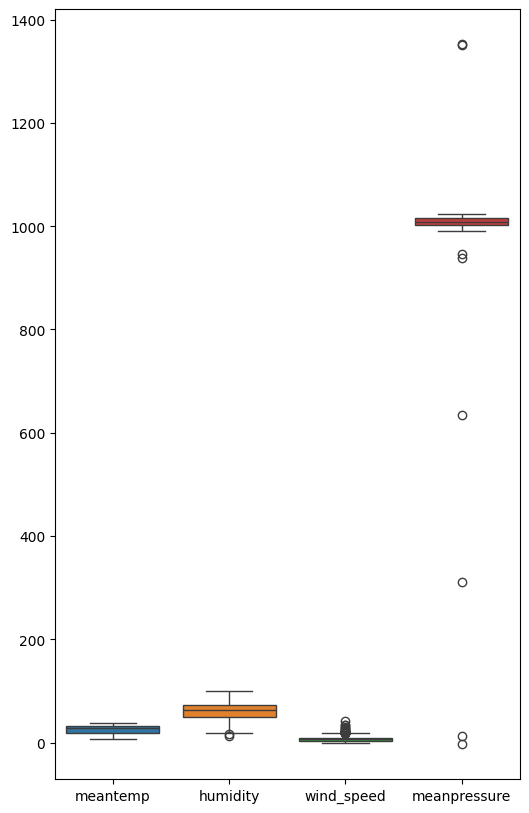

In [12]:
plt.figure(figsize=(6,10))
sns.boxplot(data=data_f)
#resolving outliers 
data_f=data_f[data_f['meanpressure']<=7000]

Temprature Trend over years 

In [14]:
data_f['date']=pd.to_datetime(data_f['date'])
data_f.set_index('date')

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


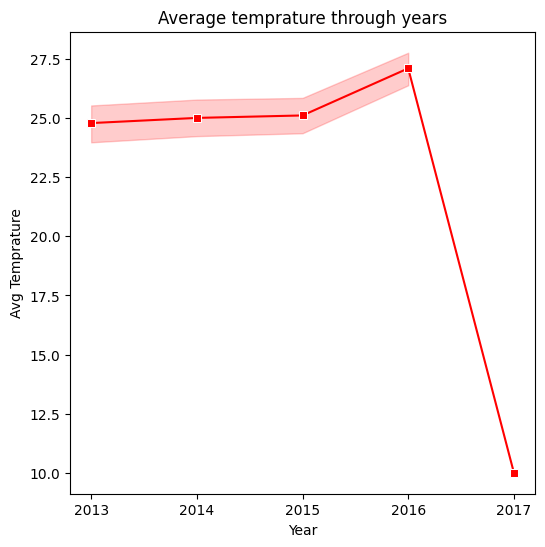

In [77]:
plt.figure(figsize=(6,6))
sns.lineplot(data=data_f,x=data_f['date'].dt.year.astype(str),y='meantemp',color='red',marker='s')
plt.title("Average temprature through years")
plt.xlabel("Year")
plt.ylabel("Avg Temprature")
plt.savefig("avgTemp.png",dpi=300)
plt.show()

The lineplot showed that the average temprature was slowly going up year by year until 2016 at which the average temprature dropped month by month until reaching the coldest day at first of 2017 .

###The relation between humidity and Temprature 

,meantemp,humidity
meantemp,1.000000,-0.571976
humidity,-0.571976,1.000000


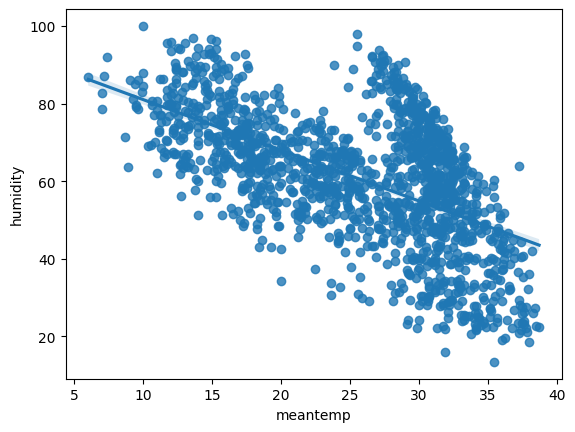

In [48]:
sns.regplot(data=data_f,x="meantemp",y="humidity")
plt.savefig("relationTempvsHumidity.png",dpi=300)

There is a strong correlation between humidity and temprature as the temprature increases the humidity decreases.

###Heat map to see the correlation between the Variables 

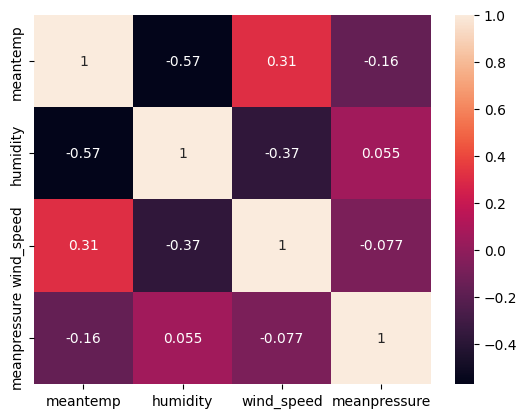

In [55]:
sns.heatmap(data_f[["meantemp","humidity","wind_speed","meanpressure"]].corr(), annot=True)
plt.savefig("correlationHeatmap.png",dpi=300)

Temperature and humidity are inversely related (makes sense physically).
Wind speed has some relation with temperature but not strong.
Pressure is not strongly correlated with any of these variables in this dataset


###Finding hottest and coldest day 

In [62]:
data_f.loc[data_f.meantemp.idxmin(),['date','meantemp']]

date        2013-01-05 00:00:00
meantemp                    6.0
Name: 4, dtype: object

In [63]:
data_f.loc[data_f.meantemp.idxmax(),['date','meantemp']]

date        2013-05-25 00:00:00
meantemp              38.714286
Name: 144, dtype: object

In [ ]:
hottest and coldest years 

In [83]:
print("minimum temp" ,data_f.groupby(data_f['date'].dt.year).meantemp.mean().min())
print("year",data_f.groupby(data_f['date'].dt.year).meantemp.mean().idxmin())

minimum temp 10.0
year 2017


In [84]:
print("maximum temp" ,data_f.groupby(data_f['date'].dt.year).meantemp.mean().max())
print("year",data_f.groupby(data_f['date'].dt.year).meantemp.mean().idxmax())

maximum temp 27.106578610652132
year 2016
